# Decompress zipped image data

In [ ]:
import zipfile
import os
zipp = zipfile.ZipFile('/content/drive/MyDrive/E6893.zip', 'r')
zipp.extractall(os.getcwd())
zipp = zipfile.ZipFile('/content/drive/MyDrive/E6893 Images/people3/people.zip', 'r')
zipp.extractall(os.getcwd())
zipp = zipfile.ZipFile('/content/drive/MyDrive/E6893 Images/anime2/anime2.zip', 'r')
zipp.extractall(os.getcwd())
zipp = zipfile.ZipFile('/content/drive/MyDrive/coco.zip', 'r')
zipp.extractall(os.getcwd())
zipp.close()

# Import necessary libraries, write needed functions

In [2]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.utils import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

import pandas as pd
import os

### Getting landscape image data,resizing them and appending in array

In [ ]:
# # to get the files in proper order
# def sorted_alphanumeric(data):  
#     convert = lambda text: int(text) if text.isdigit() else text.lower()
#     alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
#     return sorted(data,key = alphanum_key)

In [ ]:
# defining the size of the image
SIZE = 256

### Plotting Color image and it's corresponding grayscale image

In [ ]:
# defining function to plot images pair
def plot_images1(color,grayscale,size):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 15)
    color = tf.image.resize(color, size,
                    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    plt.imshow(color)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 15)
    grayscale = tf.image.resize(grayscale, size,
                    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    plt.imshow(grayscale)
    plt.axis('off')
   
    plt.show()

In [ ]:
# defining function to plot images pair
def plot_images2(color,grayscale,predicted,size):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Input Image ', fontsize = 15)
    grayscale = tf.image.resize(grayscale, size,
                method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    plt.imshow(grayscale)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Target Image', fontsize = 15)
    color = tf.image.resize(color, size,
                method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    plt.imshow(color)
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('Generated by Autoencoder', fontsize = 15)
    predicted = tf.image.resize(predicted, size,
                method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    plt.imshow(predicted)
    plt.axis('off')
   
    plt.show()

# Defining the model

In [ ]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample


In [ ]:
def model():
    inputs = layers.Input(shape= [256,256,3])
    d1 = down(128,(3,3),False)(inputs)
    d2 = down(128,(3,3),False)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(512,(3,3),True)(d3)
    
    d5 = down(512,(3,3),True)(d4)
    #upsampling
    u1 = up(512,(3,3),False)(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),False)(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)

# Training and saving models: Anime as an example

In [ ]:
color_img = []
size = []
path = '/content/anime2/color'
path_names = '/content/anime2/all_images.csv'
files = pd.read_csv(path_names).image_name
# ##
# i = 0
for f in tqdm(files):      
      if f.startswith('._'):
        continue
      img = cv2.imread(os.path.join(path, f), 1)
      # open cv reads images in BGR format so we have to convert it to RGB
      si = img.shape[:2]
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #resizing image
      img = cv2.resize(img, (SIZE, SIZE))
      img = img.astype('float32') / 255.0
      color_img.append(img_to_array(img))
      size.append(si)
      # ##
      # i += 1
      # if i == 20:
      #   break


gray_img = []
path = '/content/anime2/grey'
# ##
# i = 0
for f in tqdm(files):
      if f.startswith('._'):
        continue
      img = cv2.imread(os.path.join(path, f), 1)

      #resizing image
      img = cv2.resize(img, (SIZE, SIZE))
      img = img.astype('float32') / 255.0
      gray_img.append(img_to_array(img))
      # ##
      # i += 1
      # if i == 20:
      #   break

100%|██████████| 7744/7744 [01:00<00:00, 127.69it/s]


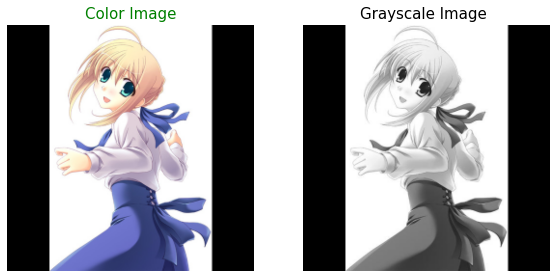

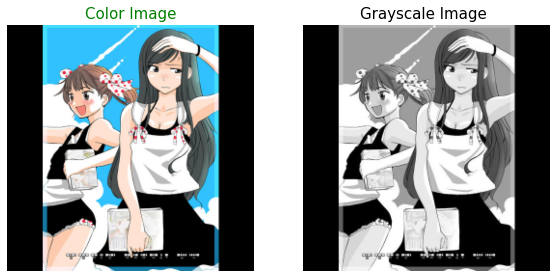

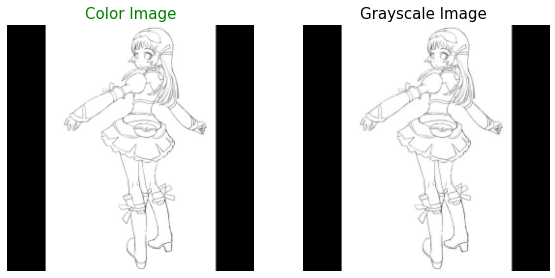

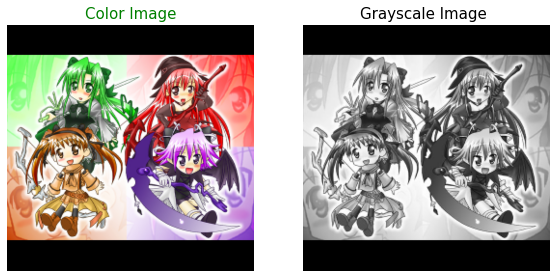

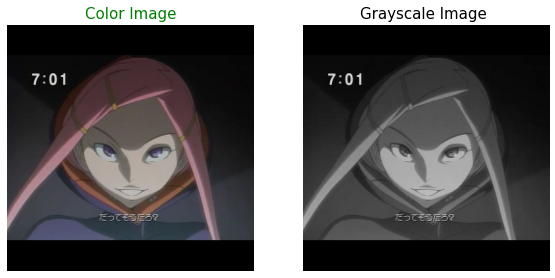

In [ ]:
for i in range(0,5):
     plot_images1(color_img[i],gray_img[i],size[i])

In [ ]:
BUFFER_SIZE = 6500

train_gray_image = gray_img[:BUFFER_SIZE]
train_color_image = color_img[:BUFFER_SIZE]
train_size = size[:BUFFER_SIZE]

test_gray_image = gray_img[BUFFER_SIZE:]
test_color_image = color_img[BUFFER_SIZE:]
test_size = size[BUFFER_SIZE:]
# reshaping
train_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))
train_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))
print('Train color image shape:',train_c.shape)


test_gray_image = np.reshape(test_gray_image,(len(test_gray_image),SIZE,SIZE,3))
test_color_image = np.reshape(test_color_image, (len(test_color_image),SIZE,SIZE,3))
print('Test color image shape',test_color_image.shape)

Train color image shape: (6500, 256, 256, 3)
Test color image shape (1244, 256, 256, 3)


In [ ]:
model = model()

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

model.fit(train_g, train_c, epochs = 200, batch_size = 128, verbose = 1)
# 0-200

Epoch 1/200
51/51 [==============================] - 26s 253ms/step - loss: 0.1774 - acc: 0.3492
Epoch 2/200
51/51 [==============================] - 11s 212ms/step - loss: 0.0811 - acc: 0.4239
Epoch 3/200
51/51 [==============================] - 11s 213ms/step - loss: 0.0743 - acc: 0.4458
Epoch 4/200
51/51 [==============================] - 11s 212ms/step - loss: 0.0661 - acc: 0.4653
Epoch 5/200
51/51 [==============================] - 11s 212ms/step - loss: 0.0640 - acc: 0.4591
Epoch 6/200
51/51 [==============================] - 11s 211ms/step - loss: 0.0604 - acc: 0.4683
Epoch 7/200
51/51 [==============================] - 11s 213ms/step - loss: 0.0592 - acc: 0.4716
Epoch 8/200
51/51 [==============================] - 11s 212ms/step - loss: 0.0571 - acc: 0.4788
Epoch 9/200
51/51 [==============================] - 11s 211ms/step - loss: 0.0552 - acc: 0.4759
Epoch 10/200
51/51 [==============================] - 11s 212ms/step - loss: 0.0534 - acc: 0.4843
Epoch 11/200
51/51 [=========

In [ ]:
model.evaluate(test_gray_image,test_color_image)

39/39 [==============================] - 2s 37ms/step - loss: 0.0484 - acc: 0.6711


[0.04839469864964485, 0.6710658669471741]

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/auto_anime200e.h5')

In [ ]:
for i in range(201,209):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1,SIZE, SIZE,3), verbose=0),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images2(test_color_image[i],test_gray_image[i],predicted, test_size[i])

Output hidden; open in https://colab.research.google.com to view.